# **Neural Networks with Functional API**

### **1. Import Necessary Libraries**

In [28]:
# Import the os module & set TensorFlow to suppress less severe logging messages. This helps reduce clutter in the output.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf      # for building and training the neural network
from tensorflow.keras.datasets import mnist      # for loading the MNIST dataset
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical      # for converting labels to one-hot encoding
import matplotlib.pyplot as plt      # for plotting and visualizing the data and results

### **2. Load the MNIST Dataset**

**MNIST Dataset:**
The MNIST dataset consists of images of handwritten digits, where each image is labeled with a digit between 0 and 9. Therefore, there are 10 possible classes (one for each digit).

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **3. Preprocessing the MNIST Dataset**

In [30]:
# Purpose: Reshape the 28x28 pixel images into 1D arrays of size 784 (28*28) and
# normalize pixel values to the range [0, 1] by dividing by 255.
x_train, x_test = x_train.reshape(-1, 28*28).astype('float32')/255.0, x_test.reshape(-1, 28*28).astype('float32')/255.0

In [31]:
# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

### **4. Building and Using a Functional Model**

In [32]:
# Define input layer with shape (784,)
inputs = layers.Input(shape=(28*28,))

# Add a Dense (fully connected) layer with 512 units and ReLU activation.
x = layers.Dense(512, activation='relu')(inputs)

# Add another Dense layer with 256 units and ReLU activation.
x = layers.Dense(256, activation='relu')(x)

# Add a final Dense layer with 10 units and softmax activation for classification.
outputs = layers.Dense(10, activation='softmax')(x)

# Create the model using the inputs and outputs.
model = models.Model(inputs=inputs, outputs=outputs)

### **5. Compile the Model**

In [33]:
# Compile the model with a loss function, optimizer, and metrics.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### **6. Train the Model**

In [34]:
# Train the model with training data.
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2035 - accuracy: 0.9383 - val_loss: 0.1105 - val_accuracy: 0.9660
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0834 - accuracy: 0.9738 - val_loss: 0.0858 - val_accuracy: 0.9727
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0941 - val_accuracy: 0.9739
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0442 - accuracy: 0.9854 - val_loss: 0.0926 - val_accuracy: 0.9749
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0341 - accuracy: 0.9887 - val_loss: 0.1038 - val_accuracy: 0.9729


### **7. Evaluate the Model**

In [35]:
# Evaluate the model on the test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9755
Test Loss: 0.090947225689888
Test Accuracy: 0.9754999876022339


### **8. Plot Training and Validation Metrics**

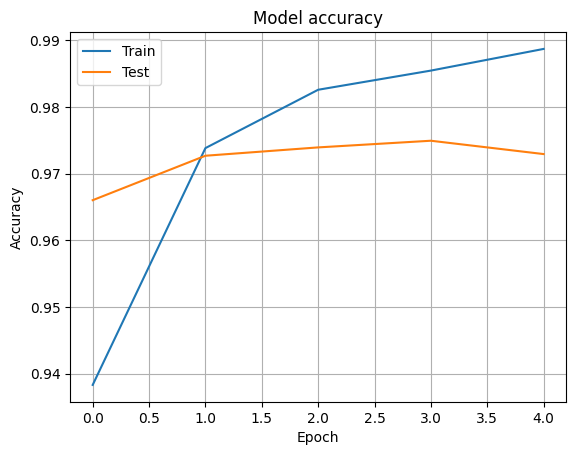

In [36]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

### **9. Make Predictions with the Model**

In [37]:
# Predict features from the training data and print the shape of the output.
# Note: You can use `model.predict` to get predictions, but for features, we use the intermediate model.
feature_model = models.Model(inputs=inputs, outputs=model.layers[-2].output)
feature = feature_model.predict(x_train)
print(feature.shape)

1875/1875 [==============================] - 4s 2ms/step
(60000, 256)
